<a href="https://colab.research.google.com/github/Daim-Nickel-Penny/codeinnovationseries-KIIT/blob/main/PipJs/PipJs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Risk Assessment**

Developed by


*   Manas Chandan Behera
*   Mohammad Daim khan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
credit_card_data=pd.read_csv('Credit_default_dataset.csv')
credit_card_data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
## ID is just a column Which is unique for all so no need of using this . 
credit_card_data = credit_card_data.drop(["ID"],axis=1)

In [ ]:

credit_card_data.rename(columns={'PAY_0':'PAY_1'}, inplace=True) ## Since there is no pay 1 it will be convenient 
# if we could make that to pay_1

In [ ]:
credit_card_data['EDUCATION'].value_counts() 
# Education according to the data description is a categorical Data Let us check it out 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
credit_card_data['MARRIAGE'].value_counts()
# Marriage according to the data description is a categorical Data Let us check it out 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

According to the dataset Description the meaning of number are : 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown . 
<br> For Marriage : 1=married, 2=single, 3=others
<br> We came up with the solution to map the last unknows to the others section only for reducing the features

In [ ]:
credit_card_data["EDUCATION"]=credit_card_data["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
credit_card_data["MARRIAGE"]=credit_card_data["MARRIAGE"].map({0:3,1:1,2:2,3:3})

Since we are planning to use the xgboost boosting algorithm it is mandatory for us to use the standard scaling for the whole dataset to have the values in certain range

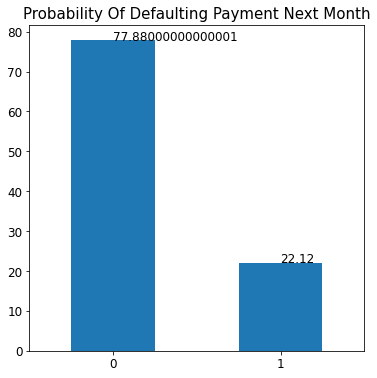

In [ ]:
credit_card_data_1 = credit_card_data.copy()
def_cnt = (credit_card_data_1['default.payment.next.month'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

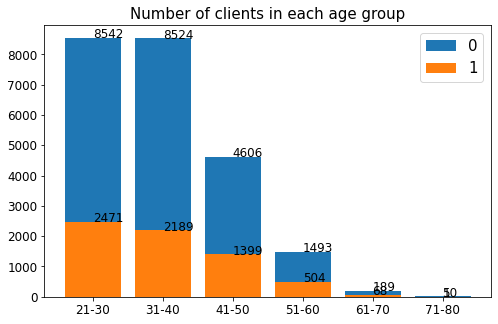

In [ ]:
credit_card_data_1 = credit_card_data.copy()
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
credit_card_data_1['AGE_BIN'] = pd.cut(x=credit_card_data_1.AGE, bins=bins, labels=names, right=True)

age_cnt = credit_card_data_1.AGE_BIN.value_counts()
age_0 = (credit_card_data_1.AGE_BIN[credit_card_data_1['default.payment.next.month'] == 0].value_counts())
age_1 = (credit_card_data_1.AGE_BIN[credit_card_data_1['default.payment.next.month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

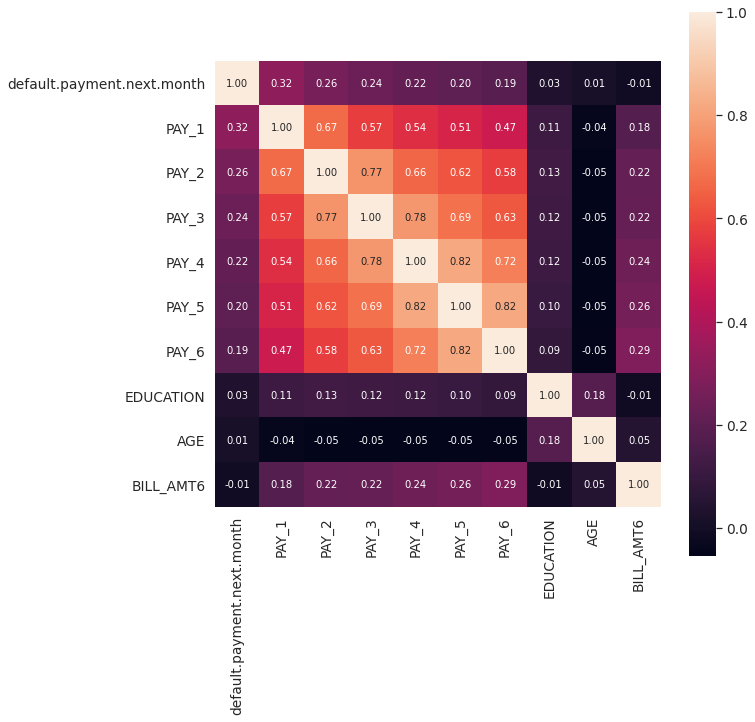

In [ ]:
credit_card_data_1 = credit_card_data.copy()
k = 10 #number of variables for heatmap
corrmat = credit_card_data_1.corr()
cols = corrmat.nlargest(k, 'default.payment.next.month')['default.payment.next.month'].index
cm = np.corrcoef(credit_card_data_1[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=credit_card_data.drop(['default.payment.next.month'],axis=1)
X=scaling.fit_transform(X)

In [ ]:
y=credit_card_data['default.payment.next.month']

The above two code cells clearly separates the X and Y that could be used for training purpose . But we will split them more so that they could be used for the purpose of the validating the values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

\The Below function is just written to have the time taken by the optimizor to work .

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(22500, 23) (7500, 23) (22500,) (7500,)


In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=3,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   22.4s finished



 Time taken: 0 hours 0 minutes and 24.53 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 1}

In [ ]:
best_classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
best_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import plot_confusion_matrix

In [ ]:
y_pred = best_classifier.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.00%


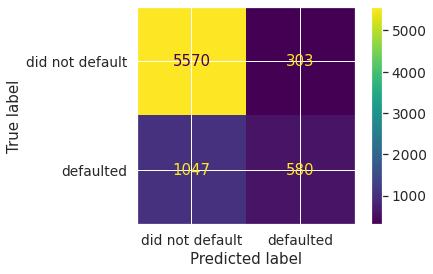

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_classifier,X_test,y_test,values_format ='d',display_labels = ["did not default","defaulted"])

In [ ]:
import pickle
filename = 'PipJs.pkl'
pickle.dump(best_classifier, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.82
